In [2]:
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sn
import pandas as pd
import matplotlib as plt
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("jpred4.tsv", sep='\t')
df.head()

,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus


In [4]:
!pip install matplotlib
%matplotlib inline

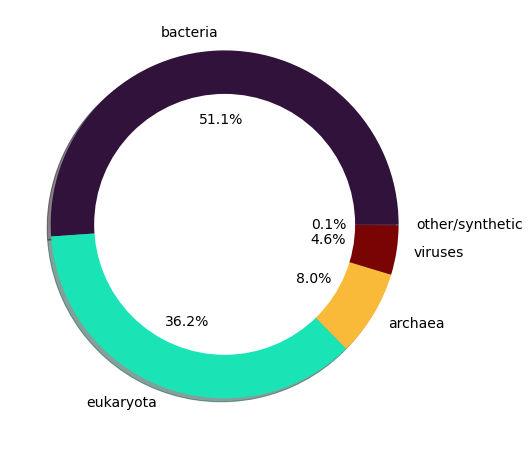

In [6]:
cmap = plt.get_cmap("turbo")

colors = [cmap(i) for i in np.linspace(0, 1, 4)]

df.Suprekingdom.value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8),shadow='True', fontsize=14,ylabel='',colors=colors)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

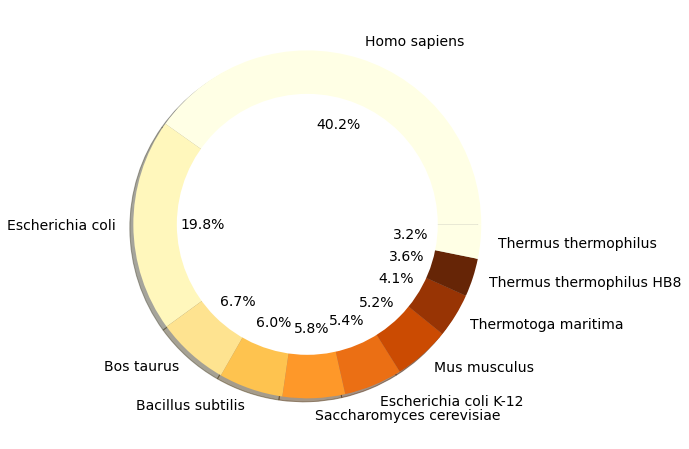

In [7]:
cmap = plt.get_cmap("YlOrBr")

colors = [cmap(i) for i in np.linspace(0, 1, 9)]
df.TaxaName.value_counts()[0:10].plot.pie(autopct='%1.1f%%',ylabel='',figsize=(8,8),shadow="True",colors=colors,fontsize=14)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [9]:
Species_count = df["TaxaName"].value_counts()
type(Species_count)
# list1 = Species_count.keys()

# inde_x = pd.DataFrame(list1)

species_df = pd.DataFrame(Species_count)
species_df["Species"]=species_df.index #["Species", "Sum"]

species_df.rename(columns = {"TaxaName":"Total"}, inplace=True) 
type(species_df)
species_df.shape

(420, 2)

In [10]:
species_df_sort = species_df.sort_values(by="Total", axis=0, ascending=False)
top5 = species_df_sort.nlargest(5, ['Total'])
display(top5)
print('sum of top 5')
print(top5['Total'].sum())
bottom_all_but5 = species_df_sort.iloc[5:420,0]
rest=bottom_all_but5.sum()
print(rest)

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae


sum of top 5
420
928


In [8]:
top5.loc["Other"]=[928,'Other']
display(top5)

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Other,928,Other


In [11]:
ssSCOP = df['SCOPClass'].value_counts()
ssSCOP

df_ssSCOP = ssSCOP.rename_axis("SCOPClass").to_frame("SCOPClass")
df_ssSCOP

,SCOPClass
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


<AxesSubplot:>

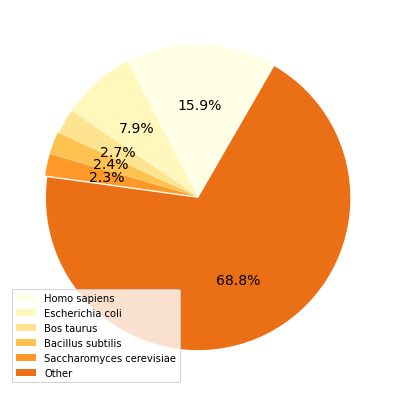

In [36]:
top5.plot.pie(y="Total", autopct='%1.1f%%',figsize=(7,7), startangle=60, colors=colors,  explode=(0,0,0,0.01,0.01, 0.01),ylabel='', labels=None,fontsize=14)


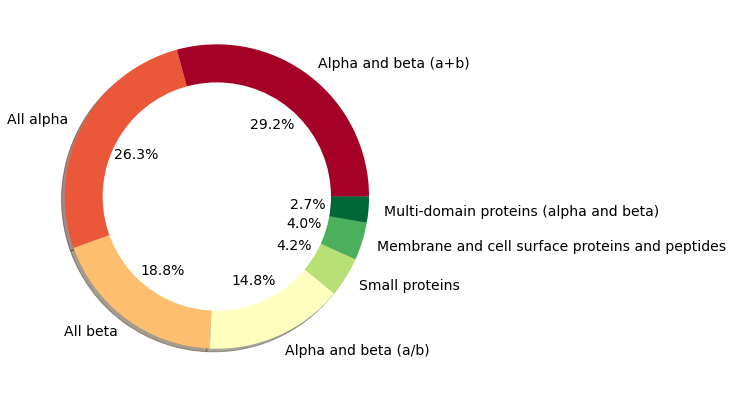

In [12]:
cmap = plt.get_cmap("RdYlGn")

colors = [cmap(i) for i in np.linspace(0, 1, 7)]
df_ssSCOP.plot.pie(y="SCOPClass",autopct='%1.1f%%',legend = False,ylabel='',figsize=(7,7),shadow="True",colors=colors,fontsize=14)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

<AxesSubplot:xlabel='Length', ylabel='SCOPClass'>

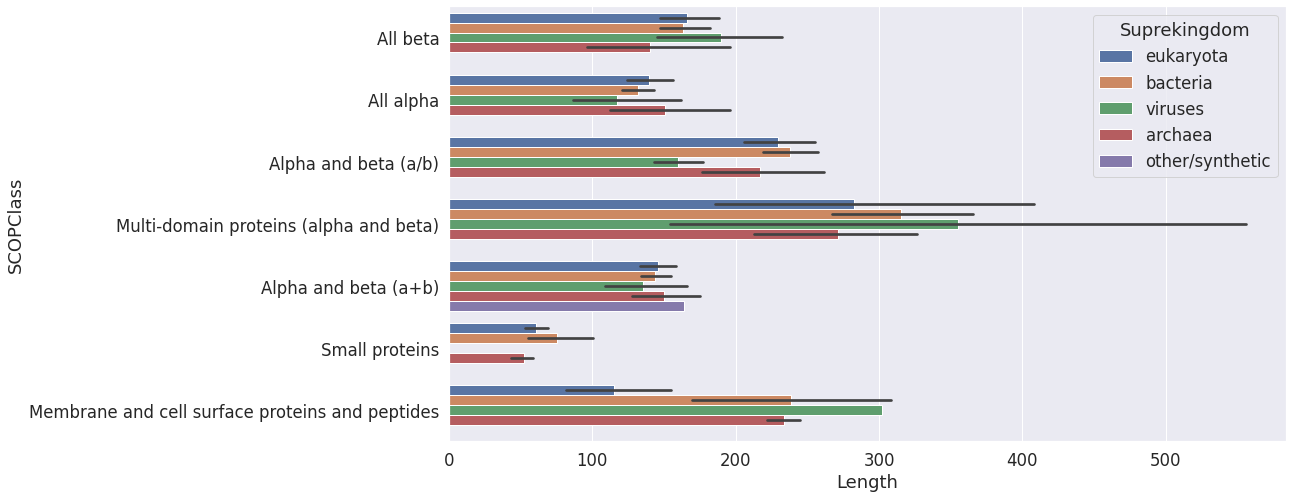

In [88]:
sn.set(rc = {'figure.figsize':(15,8)})
sn.set(font_scale = 1.5)

sn.barplot( x="Length", y="SCOPClass", hue="Suprekingdom",  data=df)


In [13]:
length = 218421
aa_counts_dict = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
aa_counts_df = pd.DataFrame.from_dict(aa_counts_dict, orient = "index",columns=["Total Number"])
aa_counts_df["Aminoacids"] = aa_counts_df.index
aa_counts_df

,Total Number,Aminoacids
A,18387,A
C,2908,C
E,15539,E
D,12678,D
G,15818,G
F,8585,F
I,12434,I
H,4897,H
K,13105,K
M,4690,M


In [38]:
aa_counts_df["Total Number"] = aa_counts_df["Total Number"].div(length)
aa_counts_df

,Total Number,Aminoacids
A,0.084181,A
C,0.013314,C
E,0.071142,E
D,0.058044,D
G,0.072420,G
F,0.039305,F
I,0.056927,I
H,0.022420,H
K,0.059999,K
M,0.021472,M


In [39]:
aa_counts_df=aa_counts_df.sort_values(['Total Number']).reset_index(drop=True)

<AxesSubplot:xlabel='Aminoacids', ylabel='Total Number'>

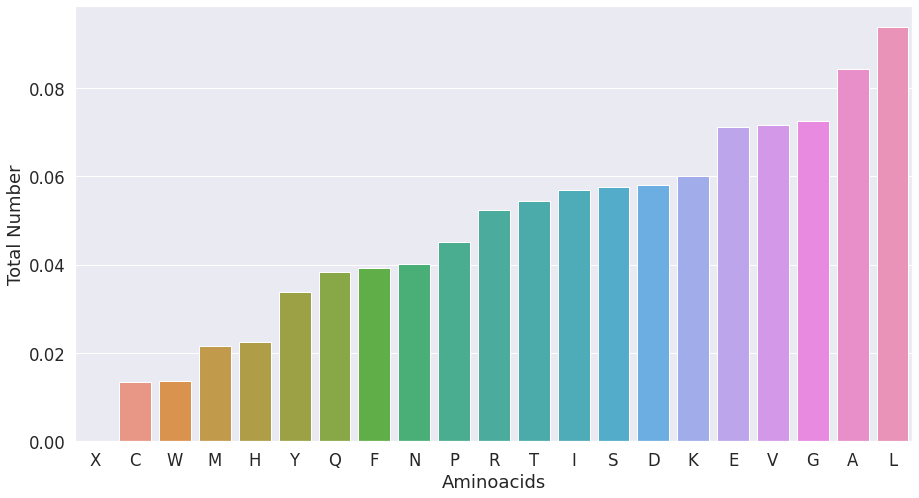

In [40]:
sn.set(rc = {'figure.figsize':(15,8)})
sn.set(font_scale = 1.5)

sn.barplot(x="Aminoacids", y= "Total Number", data=aa_counts_df)

In [91]:
li=[ ['V', 'H', 5112, 77742], ['V', 'E', 6494, 48588], ['V', 'C', 4039, 92091], ['L', 'C', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', 'C', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', 'C', 7250, 92091], ['Y', 'C', 2470, 92091], ['T', 'C', 5405, 92091],  ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', 'C', 2870, 92091], ['E', 'E', 2321, 48588], ['E', 'C', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', 'C', 2979, 92091], ['K', 'H', 5332, 77742], ['C', 'C', 1275, 92091], ['N', 'C', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'H', 3592, 77742], ['D', 'E', 1598, 48588], ['S', 'C', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', 'C', 1009, 92091], ['D', 'C', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', 'C', 4209, 92091], ['L', 'H', 9536, 77742], ['H', 'C', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', 'C', 1598, 92091], ['H', 'H', 1516, 77742], ['A', 'C', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742],  ['G', 'C', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', 'C', 3114, 92091], ['X', 'C', 3, 92091]] # 

dictio = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
for k in dictio.keys():
    li.append([k, 'Sum', dictio[k], 218421])

# print(li)

hec_tot = pd.DataFrame(li)
hec_tot.columns = ['Residue', 'SS or tot', 'Frequency', 'Total' ]
display(hec_tot)

,Residue,SS or tot,Frequency,Total
0,V,H,5112,77742
1,V,E,6494,48588
2,V,C,4039,92091
3,L,C,6096,92091
4,H,E,1105,48588
...,...,...,...,...
77,T,Sum,11902,218421
78,W,Sum,2983,218421
79,V,Sum,15645,218421
80,Y,Sum,7389,218421


In [15]:
hec_tot['Frequency'] = hec_tot['Frequency'].div(hec_tot['Total'])
hec_tot

,Residue,SS or tot,Frequency,Total
0,V,H,0.065756,77742
1,V,E,0.133654,48588
2,V,C,0.043859,92091
3,L,C,0.066195,92091
4,H,E,0.022742,48588
...,...,...,...,...
77,T,Sum,0.054491,218421
78,W,Sum,0.013657,218421
79,V,Sum,0.071628,218421
80,Y,Sum,0.033829,218421


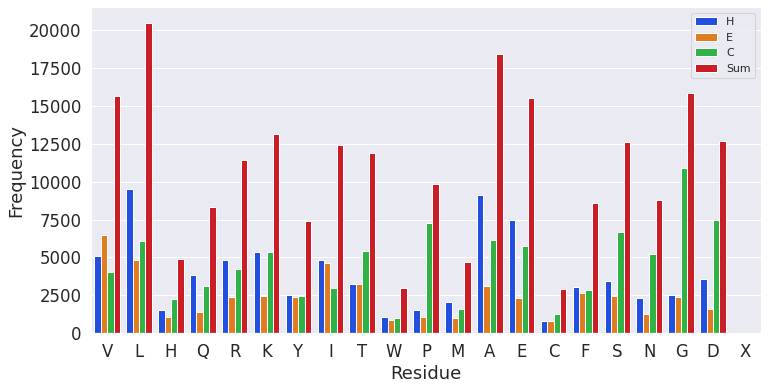

In [98]:
plt.figure(figsize=(12,6))
sn.barplot(x="Residue",y="Frequency",hue="SS or tot",data=hec_tot,palette="bright")
plt.legend(loc=1,prop={'size':11})

In [16]:
scop_df = df['SCOPClass']

In [14]:
length = 218421
d2={'E': 48588, 'C': 92091, 'H': 77742}
ss_comp= pd.DataFrame.from_dict(d2, orient = "index",columns=["TotalNumber"])
ss_comp["SecondaryStructure"] = ss_comp.index
ss_comp

,TotalNumber,SecondaryStructure
E,48588,E
C,92091,C
H,77742,H


In [15]:
ss_comp["TotalNumber"] = ss_comp["TotalNumber"].div(length)
ss_comp

,TotalNumber,SecondaryStructure
E,0.222451,E
C,0.421622,C
H,0.355927,H


<Figure size 1800x1080 with 0 Axes>

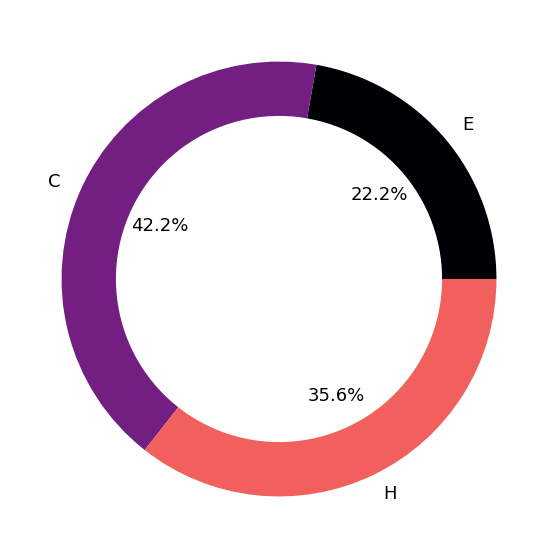

In [18]:
plt.figure(figsize=(25,15))
cmap = plt.get_cmap("magma")

colors = [cmap(i) for i in np.linspace(0, 1, 4)]

ss_comp.plot.pie(y="TotalNumber", autopct='%1.1f%%', figsize=(10, 10), fontsize=18,colors=colors,ylabel="",legend="")
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [19]:
#of the blind test set:
length = 44696
d2={'E': 9932, 'C': 17561, 'H': 17203}
ss_comp= pd.DataFrame.from_dict(d2, orient = "index",columns=["TotalNumber"])
ss_comp["SecondaryStructure"] = ss_comp.index
ss_comp

,TotalNumber,SecondaryStructure
E,9932,E
C,17561,C
H,17203,H


In [104]:
ss_comp["TotalNumber"] = ss_comp["TotalNumber"].div(length)
ss_comp

,TotalNumber,SecondaryStructure
E,0.222212,E
C,0.392899,C
H,0.384889,H


<Figure size 1800x1080 with 0 Axes>

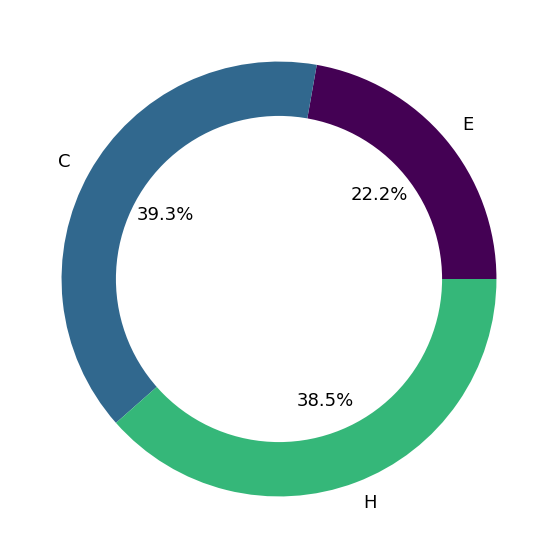

In [22]:
plt.figure(figsize=(25,15))
cmap = plt.get_cmap("viridis")

colors = [cmap(i) for i in np.linspace(0, 1, 4)]

ss_comp.plot.pie(y="TotalNumber", autopct='%1.1f%%', figsize=(10, 10), fontsize=18,colors=colors,legend="",ylabel="")
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)